# Imports and settings

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [3]:
import sklearn
sklearn.__version__

'0.24.1'

## Display settings

In [4]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Import data

In [5]:
mela = pd.read_excel('Melanoma1517_aggiornato_12042022_sub.xlsx') 

In [62]:
mela

,ID_N,sesso,eta_diagn,dinciden,ALTRA_INCIDENZA,anno,Nuove_Ulss_res,stato_civile,stato_civile_2,istruzione,istruzione_2,morfologia,breslow_new,ISTOGENETICA,STADIOT_VER8,STADION_VER8,STADIOM_VER8,STADIOTNM8_tot,mitosi,ulcerazione,regressione,tipo_crescita,sede_2,til_2,bls_linfo_positivi,bls_diametro_massimo_metastasi_m,la_linfo_positivi,STATO_311220,Causa_311220,Sopravvivenza_311220,COSTO_MELA_sdo_Y1,COSTO_MELA_sdo_Y2,COSTO_MELA_cinecaY1,COSTO_MELA_cinecaY2,COSTO_MELA_IFN_f3_Y1,COSTO_MELA_IFN_f3_Y2,COSTO_MELA_ALTOCOSTO_f3_Y1,COSTO_MELA_ALTOCOSTO_f3_Y2,COSTO_MELA_CHEMIOTERAPIA_f3_Y1,COSTO_MELA_CHEMIOTERAPIA_f3_Y2,COSTO_MELA_app_spsY1,COSTO_MELA_app_spsY2,COSTO_COMPLESSIVO_MELA_Y1,COSTO_COMPLESSIVO_MELA_Y2,til,DECESSO,DECESSO_2_anni,Sopravvivenza_2_anni,DECESSO_3_anni,Sopravvivenza_3_anni,DECESSO_Y1,etaCL,morfologia_2,mitosi_3,COSTO_COMPLESSIVO_MELA,COSTO_SDO_MELA,COSTO_SPS_MELA,COSTO_F3_MELA,COSTO_CINECA_MELA
0,M101000951,F,31,2015-02-20,NO,2015,6 Euganea,2.0,Coniugato/a,5.0,Laurea o superiore,87713.0,G-F044,2,pT4b,N3c,M0,III,3.0,Presente,Assente,Verticale,Tronco,Assente,NaN,NaN,3.0,VIVO,NaN,648,1729.66,11172.09,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,3781.00,4914.95,5510.66,16087.04,Assente,0,0,648,0,648,0,<40,Cellule Epitelioidi,2+,21597.70,12901.75,8695.95,0.00,0.0
1,M101001645,M,53,2017-11-10,NaN,2017,1 Dolomiti,NaN,NaN,NaN,NaN,87703.0,G-F041,1,pT1a,N0,M0,I,0.0,Assente,Presente,Verticale,Tronco,Presente,NaN,NaN,NaN,VIVO,NaN,1147,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,233.15,66.90,233.15,66.90,Presente,0,0,730,0,1095,0,50-59,Altro,0-2,300.05,0.00,300.05,0.00,0.0
2,M101001889,F,67,2015-09-01,NO,2015,5 Polesana,6.0,Non dichiarato,3.0,Diploma di scuola media superiore,87433.0,G-F042,1,pT1b,N0,M0,I,0.0,Assente,Assente,Verticale,Arti superiori,Presente,NaN,NaN,NaN,VIVO,NaN,1948,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,336.65,77.30,336.65,77.30,Presente,0,0,730,0,1095,0,60-69,Diffusione Superficiale,0-2,413.95,0.00,413.95,0.00,0.0
3,M101002549,F,29,2015-01-22,NO,2015,5 Polesana,6.0,Non dichiarato,0.0,Nessun titolo,87713.0,G-F041,1,pT1a,N1a,M0,III,0.0,Assente,Assente,Verticale,Tronco,Presente,1.0,0.22,0.0,VIVO,NaN,2170,5747.67,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,613.70,1187.75,6361.37,1187.75,Presente,0,0,730,0,1095,0,<40,Cellule Epitelioidi,0-2,7549.12,5747.67,1801.45,0.00,0.0
4,M101003351,F,57,2015-08-20,NO,2015,5 Polesana,NaN,NaN,NaN,NaN,87713.0,G-F041,1,pT1a,N0,M0,I,0.0,Assente,Assente,Orizzontale,Arti inferiori,Presente,NaN,NaN,NaN,VIVO,NaN,1960,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,35.80,6.80,35.80,6.80,Presente,0,0,730,0,1095,0,50-59,Cellule Epitelioidi,0-2,42.60,0.00,42.60,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,M605786587,F,95,2017-02-14,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87203.0,G-F044,2,pT4b,N0,M0,II,8.0,Presente,DM,Verticale,Arti inferiori,DM,NaN,NaN,NaN,DECEDUTO,Altro,18,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,0.00,DM,1,1,18,1,18,1,80+,NAS,2+,0.00,0.00,NaN,0.00,0.0
2643,M606975203,M,43,2017-02-16,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87433.0,G-F041,1,pT1a,N2a,M0,III,2.0,Assente,Assente,Verticale,Arti superiori,Assente,2.0,0.08,0.0,VIVO,NaN,1414,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1534.15,1108.60,1534.15,1108.60,Assente,0,0,730,0,1095,0,40-49,Diffusione Superficiale,0-2,2642.75,0.00,2642.75,0.00,0.0
2644,M607314943,M,68,2017-01-18,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,NaN,DM,0,pT0,NaN,M1,IV,NaN,DM,DM,DM,DM,DM,NaN,NaN,NaN,VIVO,NaN,1443,0.00,0.00,0.0,0.0,0.0,0.0,46706.27,0.00,0.0,0.0,6879.55,3415.40,53585.82,3415.40,DM,0,0,730,0,1095,0,60-69,DM,DM,57001.22,0.00,10294.95,46706.27,0.0
2645,M608281943,F,67,2017-03-31,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87203.0,DM,0,NaN,N1c,M1,IV,NaN,DM,DM,DM,Arti inferiori,DM,NaN,NaN,NaN,VIVO,NaN,1371,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,6847.25,11

In [63]:
mela.shape

(2647, 59)

# Data preprocessing

## Inspect data

In [64]:
for c in mela.columns:
    print('\n-----{}-----'.format(c))
    print(mela[c].value_counts())
    print('Missin values ', np.sum(mela[c].isna()))


-----ID_N-----
M304337988    1
M305477513    1
M106985540    1
M108071303    1
M306951418    1
             ..
M402317491    1
M301745304    1
M108870822    1
M403204706    1
M401690776    1
Name: ID_N, Length: 2647, dtype: int64
Missin values  0

-----sesso-----
M    1404
F    1243
Name: sesso, dtype: int64
Missin values  0

-----eta_diagn-----
70     64
75     62
60     61
48     59
57     59
77     59
53     59
58     59
67     59
49     58
44     58
46     55
62     55
50     53
72     52
54     52
74     52
41     51
63     50
61     50
69     49
47     49
56     48
43     48
64     48
68     48
55     48
76     47
78     47
59     47
80     47
52     46
42     46
71     46
65     45
51     44
73     44
66     41
45     41
39     39
40     37
79     36
83     35
81     35
82     30
38     30
36     29
85     29
84     28
86     26
37     23
35     22
87     21
34     18
90     17
33     16
88     16
30     14
28     13
91     12
31     11
29     11
89     10
32     10
92      9
2

In [6]:
print(np.mean(mela['eta_diagn']))
print(np.median(mela['eta_diagn']))
print(np.min(mela['eta_diagn']))
print(np.max(mela['eta_diagn']))

59.736305251227805
60.0
15
101


In [7]:
print(np.mean(mela['Sopravvivenza_3_anni']))
print(np.median(mela['Sopravvivenza_3_anni']))
print(np.min(mela['Sopravvivenza_3_anni']))
print(np.max(mela['Sopravvivenza_3_anni']))

1032.884397431054
1095.0
0
1095


In [66]:
print(np.nanmean(mela['mitosi']))
print(np.nanmedian(mela['mitosi']))
print(np.min(mela['mitosi']))
print(np.max(mela['mitosi']))
print(np.sum(mela['mitosi'].isna()))

2.6305986696230597
1.0
0.0
55.0
392


In [67]:
print(np.nanmean(mela['bls_diametro_massimo_metastasi_m']))
print(np.nanmedian(mela['bls_diametro_massimo_metastasi_m']))
print(np.min(mela['bls_diametro_massimo_metastasi_m']))
print(np.max(mela['bls_diametro_massimo_metastasi_m']))
print(np.sum(mela['bls_diametro_massimo_metastasi_m'].isna()))

2.2623407407407403
1.2
0.03
22.0
2512


## Clean data

In [68]:
# simplify stage T classes and replace missing with 'pT0/pTX/DM' class

mela['STADIOT_VER8'].replace('pT1a', 'pT1', inplace = True)
mela['STADIOT_VER8'].replace('pT1b', 'pT1', inplace = True)
mela['STADIOT_VER8'].replace('pT2a', 'pT2', inplace = True)
mela['STADIOT_VER8'].replace('pT2b', 'pT2', inplace = True)
mela['STADIOT_VER8'].replace('pT3a', 'pT3', inplace = True)
mela['STADIOT_VER8'].replace('pT3b', 'pT3', inplace = True)
mela['STADIOT_VER8'].replace('pT4a', 'pT4', inplace = True)
mela['STADIOT_VER8'].replace('pT4b', 'pT4', inplace = True)

#mela['STADIOT_VER8'].replace('pTX', 'pT0/pTX/DM', inplace = True)

mela['STADIOT_VER8'].replace(np.nan, 'pT0/DM', inplace = True)
mela['STADIOT_VER8'].replace('pT0', 'pT0/DM', inplace = True)

mela['STADIOT_VER8'].value_counts()

pT1       1612
pT2        370
pT3        277
pT4        237
pT0/DM     126
pTX         25
Name: STADIOT_VER8, dtype: int64

In [69]:
np.sum(mela['STADIOT_VER8'].isna())

0

In [70]:
# replace missing stage N with 'N0/DM' class

mela['STADION_VER8'].replace(np.nan, 'NX/DM', inplace = True)
#mela['STADION_VER8'].replace('N0', 'N0/DM', inplace = True)
mela['STADION_VER8'].value_counts()


N0       2291
N1a       125
NX/DM      59
N2a        47
N3         39
N1c        38
N3c        16
N1b        14
N2c         9
N2b         9
Name: STADION_VER8, dtype: int64

In [71]:
np.sum(mela['STADION_VER8'].isna())

0

In [72]:
# replace missing stage M with 'M0/DM' class

mela['STADIOM_VER8'].replace(np.nan, 'M0/DM', inplace = True)
mela['STADIOM_VER8'].replace('M0', 'M0/DM', inplace = True)
mela['STADIOM_VER8'].value_counts()

M0/DM    2554
M1         93
Name: STADIOM_VER8, dtype: int64

In [73]:
np.sum(mela['STADIOM_VER8'].isna())

0

In [74]:
# convert hystology with original class names (please refere to 'Tracciato record registro Melanoma')

mela['ISTOGENETICA'].value_counts() # ci sono solo 0,1,2,3,4,5,6,10

mela['ISTOGENETICA'].replace(0, 'Malignant melanoma', inplace = True)
mela['ISTOGENETICA'].replace(1, 'Superficial spreading melanoma', inplace = True)
mela['ISTOGENETICA'].replace(2, 'Nodular melanoma', inplace = True)
mela['ISTOGENETICA'].replace(3, 'Lentigo maligna', inplace = True)
mela['ISTOGENETICA'].replace(4, 'Acral-lentiginous melanoma', inplace = True)
mela['ISTOGENETICA'].replace(5, 'Desmoplastic melanoma', inplace = True)
mela['ISTOGENETICA'].replace(6, 'Melanoma arising from blue naevus', inplace = True)
mela['ISTOGENETICA'].replace(10, 'Spitzoid melanoma', inplace = True)


In [75]:
# replace 'DM' with np.nan to fill with imputation techniques

mela['ulcerazione'].replace('DM',np.nan, inplace = True)
mela['regressione'].replace('DM',np.nan, inplace = True)
mela['tipo_crescita'].replace('DM',np.nan, inplace = True)
mela['til'].replace('DM',np.nan, inplace = True)
mela['morfologia_2'].replace('DM',np.nan, inplace = True)
mela['sede_2'].replace('DM',np.nan, inplace = True)
mela['breslow_new'].replace('DM',np.nan, inplace = True)


In [76]:
# replace missing costs with 0 (assuming expense not performed)

mela['COSTO_MELA_app_spsY1'].replace(np.nan, 0, inplace = True)
mela['COSTO_MELA_app_spsY2'].replace(np.nan, 0, inplace = True)
mela['COSTO_SPS_MELA'].replace(np.nan, 0, inplace = True)

In [77]:
# create binary variable for positive SLNB (positive if number >= 1)

mela['SLNB Positive'] = 1*(mela.bls_linfo_positivi >= 1) # in this way the variable is already numerically encoded (1 when positive, 0 otherwise)

In [78]:
# replace missing diameters with 0 (assuming exam not performed)

mela['bls_diametro_massimo_metastasi_m'].replace(np.nan, 0, inplace = True)

In [79]:
# total count positive lymph nodes (SLNB + lymphadenectomy)

mela['Positive Lymph Nodes'] = mela['bls_linfo_positivi'].replace(np.nan, 0) + mela['la_linfo_positivi'].replace(np.nan, 0) 

In [80]:
np.sum(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna())

1455

In [81]:
np.sum(mela['la_linfo_positivi'].isna())

2413

In [82]:
print(np.nanmean(mela['Positive Lymph Nodes']))
print(np.nanmedian(mela['Positive Lymph Nodes']))
print(np.min(mela['Positive Lymph Nodes']))
print(np.max(mela['Positive Lymph Nodes']))
print(np.sum(mela['Positive Lymph Nodes'].isna()))

0.2455610124669437
0.0
0.0
32.0
0


In [83]:
print(np.nanmean(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()),'Positive Lymph Nodes']))
print(np.nanmedian(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()),'Positive Lymph Nodes']))
print(np.min(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()), 'Positive Lymph Nodes']))
print(np.max(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()), 'Positive Lymph Nodes']))


0.5453020134228188
0.0
0.0
32.0


## Ordinal Encoding

In [84]:
from sklearn.preprocessing import OrdinalEncoder


In [85]:
# manually encode bleslow as it still contains nans

mela['breslow_new'].replace('DM',np.nan, inplace = True)
mela['breslow_new'].replace('G-F041',1.0, inplace = True)
mela['breslow_new'].replace('G-F042',2.0, inplace = True)
mela['breslow_new'].replace('G-F043',3.0, inplace = True)
mela['breslow_new'].replace('G-F044',4.0, inplace = True)

print(mela['breslow_new'].value_counts())

1.0    1347
2.0     514
3.0     381
4.0     253
Name: breslow_new, dtype: int64


## One-Hot Encoding


In [86]:
mela = mela.join(pd.get_dummies(mela['ISTOGENETICA'], prefix='istogenetica', drop_first=True))

In [87]:
mela = mela.join(pd.get_dummies(mela['sesso'], prefix='sesso', drop_first=True))

In [88]:
mela = mela.join(pd.get_dummies(mela['STADIOT_VER8'], prefix='stadioT', drop_first=False))
mela.drop('stadioT_pT0/DM', axis = 1, inplace = True) # manually drop class 'pT0/DM'

In [89]:
mela = mela.join(pd.get_dummies(mela['STADION_VER8'], prefix='stadioN', drop_first=False))
mela.drop('stadioN_NX/DM', axis = 1, inplace = True) # manually drop class 'NX/DM'

In [90]:
mela = mela.join(pd.get_dummies(mela['STADIOM_VER8'], prefix='stadioM', drop_first=False))
mela.drop('stadioM_M0/DM', axis = 1, inplace = True) # manually drop class 'M0/DM'

In [91]:
# manually encode ulceration as it still contains nans

mela['ulcerazione_Presente'] = mela['ulcerazione'] 

mela['ulcerazione_Presente'].replace('Presente',1, inplace = True)
mela['ulcerazione_Presente'].replace('Assente',0, inplace = True)

In [92]:
# manually encode regression as it still contains nans

mela['regressione_Presente'] = mela['regressione'] 

mela['regressione_Presente'].replace('Presente',1, inplace = True)
mela['regressione_Presente'].replace('Assente',0, inplace = True)

In [93]:
# manually encode growtn type as it still contains nans

mela['tipo_crescita_Verticale'] = mela['tipo_crescita'] 

mela['tipo_crescita_Verticale'].replace('Verticale',1, inplace = True)
mela['tipo_crescita_Verticale'].replace('Orizzontale',0, inplace = True)

In [94]:
# manually encode TILs as it still contains nans

mela['til_Presente'] = mela['til'] 

mela['til_Presente'].replace('Presente',1, inplace = True)
mela['til_Presente'].replace('Assente',0, inplace = True)

## Missing imputation

In [95]:
# define dataset of complete variables (exclude survival and costs outcomes, marital status, educational level and lymphnodes data)

X = mela.loc[:,['sesso_M', 'eta_diagn',
                'stadioT_pT1', 'stadioT_pT2', 'stadioT_pT3', 'stadioT_pT4', 'stadioT_pTX', 'stadioN_N0', 'stadioN_N1a', 'stadioN_N1b', 'stadioN_N1c', 'stadioN_N2a', 'stadioN_N2b', 'stadioN_N2c', 'stadioN_N3', 'stadioN_N3c', 'stadioM_M1', #'stadioM', 'stadioN', 'stadioT', 
                'istogenetica_Desmoplastic melanoma', 'istogenetica_Lentigo maligna', 'istogenetica_Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma', 'istogenetica_Spitzoid melanoma','istogenetica_Superficial spreading melanoma', 
                ]]


In [96]:
# impute mitotic count with linear regression

from sklearn.linear_model import LinearRegression

X_train = X.loc[~mela.mitosi.isna()]
y_train = mela.loc[~mela.mitosi.isna(), 'mitosi']
X_test = X.loc[mela.mitosi.isna()]

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = y_pred * (y_pred>=0)

mela.loc[mela.mitosi.isna(), 'mitosi'] = y_pred
mela.mitosi.isna().any()

False

In [97]:
# impute ulceration with logistic regression

from sklearn.linear_model import LogisticRegression

X_train = X.loc[~mela.ulcerazione_Presente.isna()]
y_train = mela.loc[~mela.ulcerazione_Presente.isna(), 'ulcerazione_Presente']
X_test = X.loc[mela.ulcerazione_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class 
print(mela.ulcerazione_Presente.value_counts()/(np.sum(mela.ulcerazione_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.ulcerazione_Presente.isna(), 'ulcerazione_Presente'] = y_pred
mela.ulcerazione_Presente.isna().any()

0.8781766841468334
0.0    0.817265
1.0    0.182735
Name: ulcerazione_Presente, dtype: float64


False

In [98]:
# impute tumor regression with logistic regression

X_train = X.loc[~mela.regressione_Presente.isna()]
y_train = mela.loc[~mela.regressione_Presente.isna(), 'regressione_Presente']
X_test = X.loc[mela.regressione_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class 
print(mela.regressione_Presente.value_counts()/(np.sum(mela.regressione_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.regressione_Presente.isna(), 'regressione_Presente'] = y_pred
mela.regressione_Presente.isna().any()

0.6610169491525424
0.0    0.614407
1.0    0.385593
Name: regressione_Presente, dtype: float64


False

In [99]:
# impute growth type with logistic regression

X_train = X.loc[~mela.tipo_crescita_Verticale.isna()]
y_train = mela.loc[~mela.tipo_crescita_Verticale.isna(), 'tipo_crescita_Verticale']
X_test = X.loc[mela.tipo_crescita_Verticale.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class
print(mela.tipo_crescita_Verticale.value_counts()/(np.sum(mela.tipo_crescita_Verticale.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.tipo_crescita_Verticale.isna(), 'tipo_crescita_Verticale'] = y_pred
mela.tipo_crescita_Verticale.isna().any()

0.7349514563106796
1.0    0.730583
0.0    0.269417
Name: tipo_crescita_Verticale, dtype: float64


False

In [100]:
# impute TILs with logistic regression

X_train = X.loc[~mela.til_Presente.isna()]
y_train = mela.loc[~mela.til_Presente.isna(), 'til_Presente']
X_test = X.loc[mela.til_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class
print(mela.til_Presente.value_counts()/(np.sum(mela.til_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.til_Presente.isna(), 'til_Presente'] = y_pred
mela.til_Presente.isna().any()

0.7863061491495857
1.0    0.780201
0.0    0.219799
Name: til_Presente, dtype: float64


False

In [101]:
# impute morfology with multiclass logistic regression

X_train = X.loc[~mela.morfologia_2.isna()]
y_train = mela.loc[~mela.morfologia_2.isna(), 'morfologia_2']
X_test = X.loc[mela.morfologia_2.isna()]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.morfologia_2.value_counts()/(np.sum(mela.morfologia_2.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.morfologia_2.isna(), 'morfologia_2'] = y_pred
mela.morfologia_2.isna().any()


0.5150449394294646
Cellule Epitelioidi        0.353654
Diffusione Superficiale    0.336069
Altro                      0.118406
NAS                        0.116061
Nodulare                   0.044158
Lentigo Maligna            0.019539
Acrale                     0.012114
Name: morfologia_2, dtype: float64


C:\Users\Buja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


False

In [102]:
# impute tumor site with multiclass logistic regression

X_train = X.loc[~mela.sede_2.isna()]
y_train = mela.loc[~mela.sede_2.isna(), 'sede_2']
X_test = X.loc[mela.sede_2.isna() ]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.sede_2.value_counts()/(np.sum(mela.sede_2.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.sede_2.isna(), 'sede_2'] = y_pred
mela.sede_2.isna().any()


0.5441003528028224
Tronco            0.499020
Arti inferiori    0.199138
Arti superiori    0.143865
Capo              0.111329
Estremita         0.046648
Name: sede_2, dtype: float64


C:\Users\Buja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


False

In [103]:
# impute breslow with multiclass logistic regression (even if continuous var.. it seems to work better)

X_train = X.loc[~mela.breslow_new.isna()]
y_train = mela.loc[~mela.breslow_new.isna(), 'breslow_new']
X_test = X.loc[mela.breslow_new.isna()]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.breslow_new.value_counts()/(np.sum(mela.breslow_new.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.breslow_new.isna(), 'breslow_new'] = y_pred
mela.breslow_new.isna().any()

0.8472945891783568
1.0    0.539880
2.0    0.206012
3.0    0.152705
4.0    0.101403
Name: breslow_new, dtype: float64


False

In [104]:
# now it is possible to encode morphology and tumor site 

mela = mela.join(pd.get_dummies(mela['morfologia_2'], prefix='morfologia', drop_first=False))
mela.drop('morfologia_Altro', axis = 1, inplace = True) # scelgo a mano di droppare 'Altro'

mela = mela.join(pd.get_dummies(mela['sede_2'], prefix='sede', drop_first=True))

In [105]:
# create breslow categorical version with original class names

mela['breslow_cat'] = mela['breslow_new'] 
mela['breslow_cat'].replace(1,'<0.75 mm', inplace = True)
mela['breslow_cat'].replace(2,'0.76–1.50 mm', inplace = True)
mela['breslow_cat'].replace(3,'1.51–3.99 mm', inplace = True)
mela['breslow_cat'].replace(4,'≥4 mm', inplace = True)

mela['breslow_cat'].value_counts()

<0.75 mm        1351
0.76–1.50 mm     612
1.51–3.99 mm     401
≥4 mm            283
Name: breslow_cat, dtype: int64

In [106]:
mela.columns

Index(['ID_N', 'sesso', 'eta_diagn', 'dinciden', 'ALTRA_INCIDENZA', 'anno',
       'Nuove_Ulss_res', 'stato_civile', 'stato_civile_2', 'istruzione',
       'istruzione_2', 'morfologia', 'breslow_new', 'ISTOGENETICA',
       'STADIOT_VER8', 'STADION_VER8', 'STADIOM_VER8', 'STADIOTNM8_tot',
       'mitosi', 'ulcerazione', 'regressione', 'tipo_crescita', 'sede_2',
       'til_2', 'bls_linfo_positivi', 'bls_diametro_massimo_metastasi_m',
       'la_linfo_positivi', 'STATO_311220', 'Causa_311220',
       'Sopravvivenza_311220', 'COSTO_MELA_sdo_Y1', 'COSTO_MELA_sdo_Y2',
       'COSTO_MELA_cinecaY1', 'COSTO_MELA_cinecaY2', 'COSTO_MELA_IFN_f3_Y1',
       'COSTO_MELA_IFN_f3_Y2', 'COSTO_MELA_ALTOCOSTO_f3_Y1',
       'COSTO_MELA_ALTOCOSTO_f3_Y2', 'COSTO_MELA_CHEMIOTERAPIA_f3_Y1',
       'COSTO_MELA_CHEMIOTERAPIA_f3_Y2', 'COSTO_MELA_app_spsY1',
       'COSTO_MELA_app_spsY2', 'COSTO_COMPLESSIVO_MELA_Y1',
       'COSTO_COMPLESSIVO_MELA_Y2', 'til', 'DECESSO', 'DECESSO_2_anni',
       'Sopravvivenza_2

In [107]:
# extract dataset to use for ML models


mela_cleaned = mela.loc[:,['sesso_M', 'eta_diagn', 
                   'breslow_new', 'mitosi',  
                   'STADIOT_VER8', 'STADION_VER8', 'STADIOM_VER8', 'ISTOGENETICA', 'sede_2', 'breslow_cat', # not encoded version
                   'istogenetica_Desmoplastic melanoma', 'istogenetica_Lentigo maligna', 'istogenetica_Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma', 'istogenetica_Spitzoid melanoma', 'istogenetica_Superficial spreading melanoma',  
                   'stadioT_pT1', 'stadioT_pT2', 'stadioT_pT3', 'stadioT_pT4', 'stadioT_pTX', 
                   'stadioN_N0', 'stadioN_N1a', 'stadioN_N1b', 'stadioN_N1c', 'stadioN_N2a', 'stadioN_N2b', 'stadioN_N2c', 'stadioN_N3', 'stadioN_N3c', 'stadioM_M1',
                   'ulcerazione_Presente', 'regressione_Presente', 'tipo_crescita_Verticale', 'til_Presente', 
                    #'morfologia_Acrale', 'morfologia_Cellule Epitelioidi', 'morfologia_Diffusione Superficiale', 'morfologia_Lentigo Maligna', 'morfologia_NAS', 'morfologia_Nodulare',
                   'sede_Arti superiori', 'sede_Capo', 'sede_Estremita', 'sede_Tronco',
                   'SLNB Positive', 'bls_diametro_massimo_metastasi_m',  'Positive Lymph Nodes',
                   'DECESSO_3_anni', 'Sopravvivenza_3_anni',
                   'COSTO_COMPLESSIVO_MELA', 'COSTO_SDO_MELA', 'COSTO_SPS_MELA', 'COSTO_F3_MELA', 'COSTO_CINECA_MELA'
            ]]

In [108]:
# rename columns in english

mela_cleaned.rename(columns={'sesso_M' : 'Male', 'eta_diagn': 'age',
                'breslow_new':'Breslow thickness group', 'breslow_cat' : 'Breslow thickness',
                'STADIOT_VER8' : 'T stage', 'STADION_VER8' : 'N stage', 'STADIOM_VER8' : 'M stage', 'ISTOGENETICA' : 'Histology', 'sede_2' : 'Tumor site',
                'stadioT_pT1' : 'T1 stage', 'stadioT_pT2': 'T2 stage', 'stadioT_pT3': 'T3 stage', 'stadioT_pT4': 'T4 stage', 'stadioT_pTX': 'TX stage', 
                'stadioN_N0': 'N0 stage', 'stadioN_N1a': 'N1a stage', 'stadioN_N1b': 'N1b stage', 'stadioN_N1c': 'N1c stage', 'stadioN_N2a': 'N2a stage', 'stadioN_N2b': 'N2b stage', 'stadioN_N2c': 'N2c stage', 'stadioN_N3': 'N3 stage', 'stadioN_N3c': 'N3c stage',
                'stadioM_M1' : 'M1 stage', 
                'istogenetica_Desmoplastic melanoma' : 'Histology Desmoplastic melanoma', 'istogenetica_Lentigo maligna' : 'Histology Lentigo maligna', 'istogenetica_Malignant melanoma' : 'Histology Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus' : 'Histology Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma' :  'Histology Nodular melanoma', 'istogenetica_Spitzoid melanoma' : 'Histology Spitzoid melanoma','istogenetica_Superficial spreading melanoma' : 'Histology Superficial spreading melanoma', 
                'mitosi' : 'Mitotic count', 'ulcerazione_Presente' : 'Ulceration Present', 'regressione_Presente' : 'Tumor regression Present', 'tipo_crescita_Verticale' : 'Growth pattern Vertical', 'til_Presente' : 'TIL Present',
                
                'sede_Arti superiori': 'Tumor site Upper limb', 'sede_Capo':'Tumor site Head','sede_Estremita':'Tumor site Hands/Feet','sede_Tronco': 'Tumor site Trunk',
                'bls_diametro_massimo_metastasi_m' : 'SLNB max diameter'}, inplace = True )



                 
                     
              

In [138]:
# export complete and cleaned dataset

mela_cleaned.to_excel('Melanoma1517_sub_cleaned.xlsx', header = True, index = False)

In [5]:
# load data 

mela_cleaned = pd.read_excel('Melanoma1517_sub_cleaned.xlsx') 


In [109]:
# extract only numerical (encoded)

X = mela_cleaned.loc[:,['Male', 'age', 'Breslow thickness group', 'Mitotic count',
       'Histology Desmoplastic melanoma', 'Histology Lentigo maligna',
       'Histology Malignant melanoma',
       'Histology Melanoma arising from blue naevus',
       'Histology Nodular melanoma', 'Histology Spitzoid melanoma',
       'Histology Superficial spreading melanoma', 'T1 stage', 'T2 stage',
       'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage', 'N1b stage', 'N1c stage',
       'N2a stage', 'N2b stage', 'N2c stage', 'N3 stage', 'N3c stage',
       'M1 stage', 'Ulceration Present', 'Tumor regression Present',
       'Growth pattern Vertical', 'TIL Present', 'Tumor site Upper limb',
       'Tumor site Head', 'Tumor site Hands/Feet', 'Tumor site Trunk',
       'SLNB Positive', 'SLNB max diameter', 'Positive Lymph Nodes'  
]]

# Correlation plot



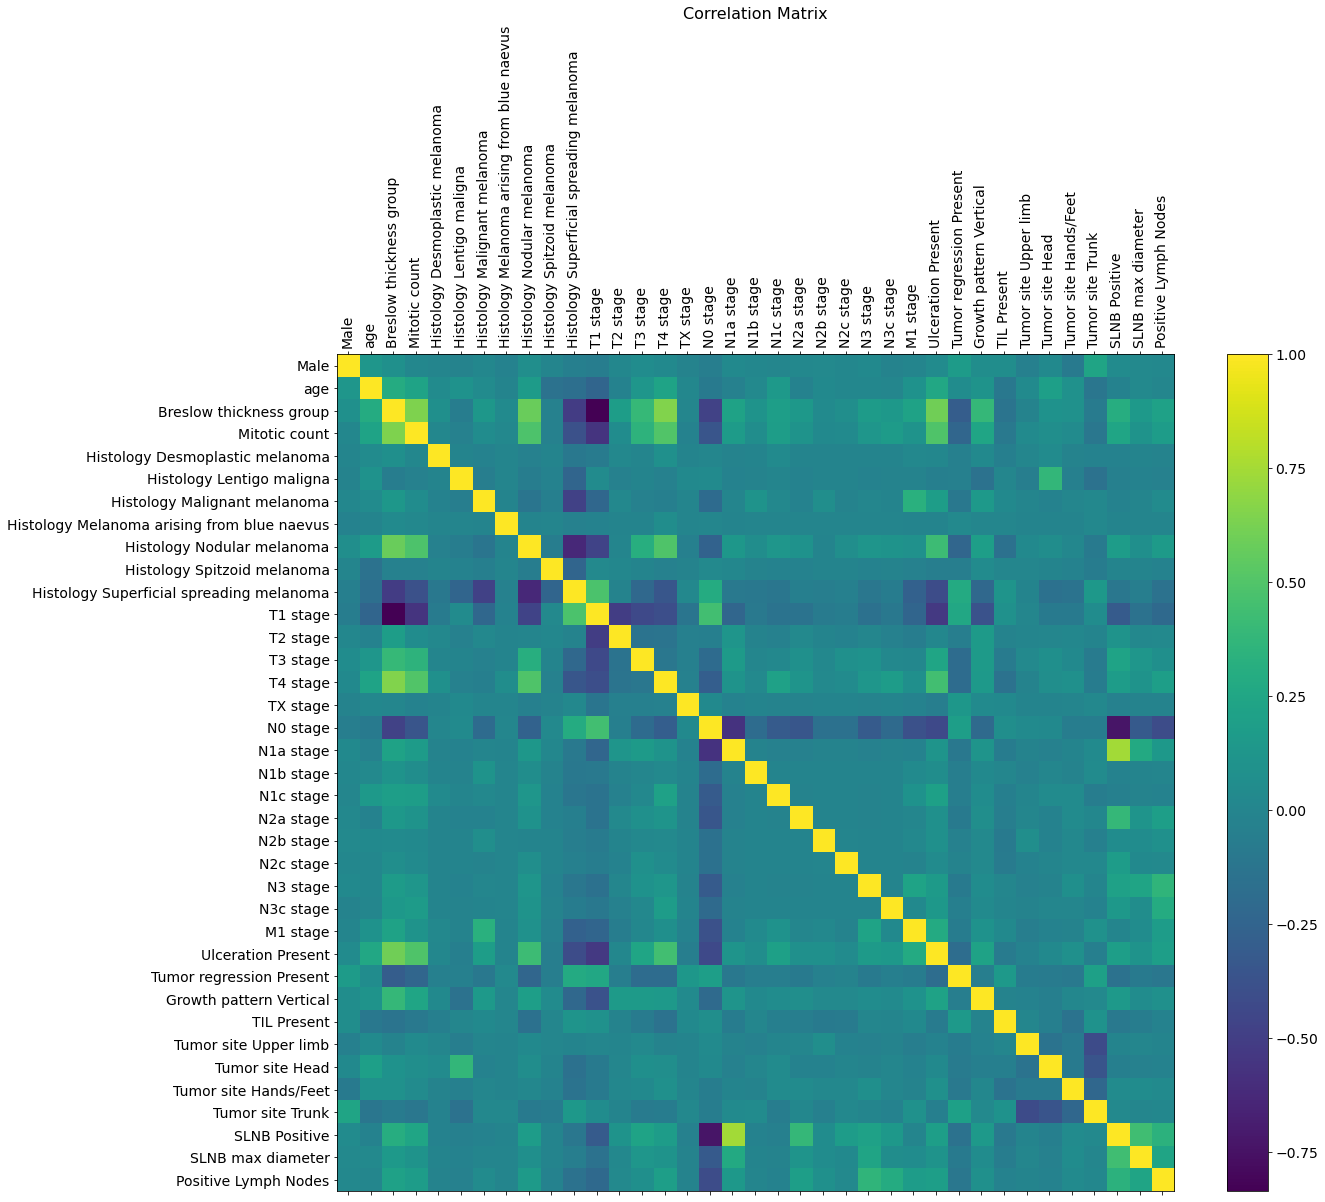

In [110]:
f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=90)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Feature selection and scaling

In [111]:
X_original = X.copy()

X_original.columns

Index(['Male', 'age', 'Breslow thickness group', 'Mitotic count',
       'Histology Desmoplastic melanoma', 'Histology Lentigo maligna',
       'Histology Malignant melanoma',
       'Histology Melanoma arising from blue naevus',
       'Histology Nodular melanoma', 'Histology Spitzoid melanoma',
       'Histology Superficial spreading melanoma', 'T1 stage', 'T2 stage',
       'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage',
       'N1b stage', 'N1c stage', 'N2a stage', 'N2b stage', 'N2c stage',
       'N3 stage', 'N3c stage', 'M1 stage', 'Ulceration Present',
       'Tumor regression Present', 'Growth pattern Vertical', 'TIL Present',
       'Tumor site Upper limb', 'Tumor site Head', 'Tumor site Hands/Feet',
       'Tumor site Trunk', 'SLNB Positive', 'SLNB max diameter',
       'Positive Lymph Nodes'],
      dtype='object')

In [112]:
X = X_original.copy()

In [113]:
# drop correlate (validating...)

X.drop(['Breslow thickness group', 'SLNB Positive', 'SLNB max diameter', 'Positive Lymph Nodes'], 
       #['T1 stage', 'T2 stage', 'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage', 'N1b stage', 'N1c stage', 'N2a stage', 'N2b stage', 'N2c stage', 'N3 stage', 'N3c stage'], 
       axis = 1, inplace = True)


In [114]:
X.columns

Index(['Male', 'age', 'Mitotic count', 'Histology Desmoplastic melanoma',
       'Histology Lentigo maligna', 'Histology Malignant melanoma',
       'Histology Melanoma arising from blue naevus',
       'Histology Nodular melanoma', 'Histology Spitzoid melanoma',
       'Histology Superficial spreading melanoma', 'T1 stage', 'T2 stage',
       'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage',
       'N1b stage', 'N1c stage', 'N2a stage', 'N2b stage', 'N2c stage',
       'N3 stage', 'N3c stage', 'M1 stage', 'Ulceration Present',
       'Tumor regression Present', 'Growth pattern Vertical', 'TIL Present',
       'Tumor site Upper limb', 'Tumor site Head', 'Tumor site Hands/Feet',
       'Tumor site Trunk'],
      dtype='object')

# Models

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Predict Survival/Death in 3 years from diagnosis

In [116]:
def print_clf_cv_scores(clf, X_train, y_train, name):

    # perform cross validation
    cv = 10
    
    scores = cross_validate(clf, X_train, y_train, cv=cv, scoring = ['accuracy','balanced_accuracy','precision_macro', 'recall_macro','f1_macro'])

    print('-------- CV MEAN SCORES (k = '+str(cv)+') ' + name + ' --------')
    print("%0.3f accuracy with a standard deviation of %0.3f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
    print("%0.3f balanced accuracy with a standard deviation of %0.3f" % (scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std()))  
    print("%0.3f precision with a standard deviation of %0.3f" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))
    print("%0.3f recall with a standard deviation of %0.3f" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std()))
    print("%0.3f f1 score with a standard deviation of %0.3f" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))


def clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test):

    # final fit and testing
    clf = clf.fit(X_train, y_train)

    # test model 
    print('-------------------- TRAIN SCORES -------------------')
    predictions = clf.predict(X_train)
    #print(classification_report(predictions, y_train))
    print("%0.3f accuracy" % (accuracy_score(predictions, y_train)))
    print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_train)))  
    print("%0.3f precision" % (precision_score(predictions, y_train)))
    print("%0.3f recall" % (recall_score(predictions, y_train)))
    print("%0.3f f1 score" % (f1_score(predictions, y_train)))



    print('-------------------- TEST SCORES ---------------------')
    predictions = clf.predict(X_test)
    #print(classification_report(predictions, y_test))
    print("%0.3f accuracy" % (accuracy_score(predictions, y_test)))
    print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_test)))  
    print("%0.3f precision" % (precision_score(predictions, y_test)))
    print("%0.3f recall" % (recall_score(predictions, y_test)))
    print("%0.3f f1 score" % (f1_score(predictions, y_test)))

    return clf
 

In [117]:
# target/label
y = mela_cleaned['DECESSO_3_anni']

# split train, test, cv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [118]:
mela_cleaned['DECESSO_3_anni'].value_counts()

0    2372
1     275
Name: DECESSO_3_anni, dtype: int64

In [119]:
X_train.shape

(2382, 33)

In [120]:
X_test.shape

(265, 33)

### Logistic Regression

Good baseline

In [121]:
from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [122]:
def print_coef_p_val(model, x):
    print("                                       Name      Coeff     Exp(Coeff)   p-val   signif")

    for n,c,p in zip(['intercept']+list(x.columns), [model.intercept_[0]] + list(model.coef_[0]), logit_pvalue(model, x)):
        s = ''
        if p<0.0001: s = '***'
        elif p<0.001: s = '**'
        elif p<0.05: s = '*'
        elif p<0.1: s = '.'
        print("%45s   %3.3f      %3.3f    %10.3E  %s" %(n,c,np.exp(c),p,s))


In [123]:
max_iter = 1000

clf = LogisticRegression(random_state=0, max_iter = max_iter, class_weight = 'balanced', C = 10e30).fit(X_train, y_train)

# cross validation and hyperparameter tuning

print_clf_cv_scores(clf, X_train, y_train, 'LR')

-------- CV MEAN SCORES (k = 10) LR --------
0.851 accuracy with a standard deviation of 0.018
0.825 balanced accuracy with a standard deviation of 0.054
0.682 precision with a standard deviation of 0.025
0.825 recall with a standard deviation of 0.054
0.717 f1 score with a standard deviation of 0.032


In [124]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.858 accuracy
0.692 balanced
0.833 precision
0.406 recall
0.546 f1 score
-------------------- TEST SCORES ---------------------
0.894 accuracy
0.747 balanced
0.800 precision
0.522 recall
0.632 f1 score


In [125]:
print_coef_p_val(clf, X_train)

                                       Name      Coeff     Exp(Coeff)   p-val   signif
                                    intercept   -6.049      0.002     1.476E-09  ***
                                         Male   0.547      1.729     1.200E-04  **
                                          age   0.095      1.100     0.000E+00  ***
                                Mitotic count   0.013      1.013     4.083E-01  
              Histology Desmoplastic melanoma   -1.250      0.287     2.404E-01  
                    Histology Lentigo maligna   0.273      1.314     6.955E-01  
                 Histology Malignant melanoma   0.021      1.021     9.732E-01  
  Histology Melanoma arising from blue naevus   -0.623      0.536     8.501E-01  
                   Histology Nodular melanoma   0.720      2.054     2.343E-01  
                  Histology Spitzoid melanoma   1.184      3.267     1.407E-01  
     Histology Superficial spreading melanoma   0.760      2.138     1.867E-01  
           

### Decision Tree

Hyperparameters to tune

* max_depth
* min_samples_split
* min_samples_leaf
* max_features

In [126]:
max_depth = 7
min_samples_split = 4
min_samples_leaf = 2
max_features = 'log2'

clf = DecisionTreeClassifier(random_state=0, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features, class_weight = 'balanced').fit(X_train, y_train)

# cross validation and hyperparameter tuning

print_clf_cv_scores(clf, X_train, y_train, 'DT')

-------- CV MEAN SCORES (k = 10) DT --------
0.824 accuracy with a standard deviation of 0.038
0.781 balanced accuracy with a standard deviation of 0.047
0.655 precision with a standard deviation of 0.035
0.781 recall with a standard deviation of 0.047
0.679 f1 score with a standard deviation of 0.044


In [127]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.788 accuracy
0.654 balanced
0.927 precision
0.318 recall
0.474 f1 score
-------------------- TEST SCORES ---------------------
0.811 accuracy
0.652 balanced
0.733 precision
0.344 recall
0.468 f1 score


#### Tree plots

In [128]:
'''clf = clf
X_plot = X_train

tree.plot_tree(clf)

import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(X_plot.columns),  
                     class_names=['Survived', 'Deceased'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph '''

"clf = clf\nX_plot = X_train\n\ntree.plot_tree(clf)\n\nimport graphviz \n\ndot_data = tree.export_graphviz(clf, out_file=None, \n                     feature_names=list(X_plot.columns),  \n                     class_names=['Survived', 'Deceased'],  \n                     filled=True, rounded=True,  \n                     special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph "

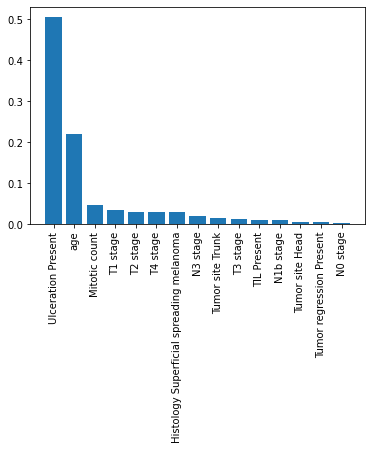

,feature,importance
25,Ulceration Present,0.505051
1,age,0.220554
2,Mitotic count,0.047859
10,T1 stage,0.035135
11,T2 stage,0.030508
13,T4 stage,0.030127
9,Histology Superficial spreading melanoma,0.029915
22,N3 stage,0.019874
32,Tumor site Trunk,0.014292
12,T3 stage,0.012550


In [129]:
clf = clf
X_plot = X_train


# get importance
importance = clf.feature_importances_
df_importance = pd.DataFrame(X_plot.columns,  columns = ['feature'])
df_importance['importance'] = importance

# sorty by importance
df_importance = df_importance.sort_values(by = 'importance', ascending = False)
df_importance = df_importance[df_importance.importance > 0]

# plot 15 most important features nonn zero
plt.bar(df_importance.feature[:15], df_importance.importance[:15])
plt.xticks(rotation='vertical')


'''for index, value in enumerate(df_importance.importance[:15]):
    plt.text(index - 0.5, value+ 0.01,
             str(value) )
    
'''
plt.show()

df_importance

### SVM

Hyperparameters to tune
* kernel
* degree (se polynomial kernel)
* gamma

In [130]:
kernel = 'linear' # 'linear', 'poly', 'rbf', 'sigmoid'
degree = 1
gamma = 'scale' #, 'auto' 'scale'
max_iter =  -1 #per non imporre un limite... provato altri valori ma non sembra migliorare fermandolo prima

clf = SVC(kernel = kernel, degree = degree, gamma = gamma, max_iter = max_iter, class_weight = 'balanced', random_state = 0).fit(X_train, y_train)

# cross validation and hyperparameter tuning

print_clf_cv_scores(clf, X_train, y_train, 'SVM')

-------- CV MEAN SCORES (k = 10) SVM --------
0.853 accuracy with a standard deviation of 0.015
0.824 balanced accuracy with a standard deviation of 0.059
0.683 precision with a standard deviation of 0.025
0.824 recall with a standard deviation of 0.059
0.717 f1 score with a standard deviation of 0.032


In [131]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.859 accuracy
0.694 balanced
0.837 precision
0.410 recall
0.550 f1 score
-------------------- TEST SCORES ---------------------
0.906 accuracy
0.766 balanced
0.833 precision
0.556 recall
0.667 f1 score


### Gradient Boosting

Hyperparameters to tune

* n_estimators
* min_samples_split
* min_samples_leaf
* max_depth

In [132]:
n_estimators = 100
max_depth = 4
min_samples_split = 2
min_samples_leaf = 1
max_features = 'log2'


clf = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth, max_features=max_features, random_state=0).fit(X_train, y_train)

# cross validation and hyperparameter tuning

print_clf_cv_scores(clf, X_train, y_train, 'GB')

-------- CV MEAN SCORES (k = 10) GB --------
0.910 accuracy with a standard deviation of 0.012
0.683 balanced accuracy with a standard deviation of 0.035
0.767 precision with a standard deviation of 0.047
0.683 recall with a standard deviation of 0.035
0.713 f1 score with a standard deviation of 0.038


In [133]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.950 accuracy
0.904 balanced
0.624 precision
0.850 recall
0.720 f1 score
-------------------- TEST SCORES ---------------------
0.921 accuracy
0.836 balanced
0.467 precision
0.737 recall
0.571 f1 score


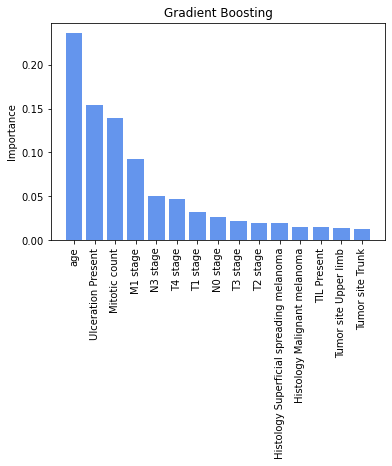

,feature,importance
1,age,0.235816
25,Ulceration Present,0.153868
2,Mitotic count,0.139760
24,M1 stage,0.092613
22,N3 stage,0.050778
13,T4 stage,0.046804
10,T1 stage,0.032663
15,N0 stage,0.026107
12,T3 stage,0.022154
11,T2 stage,0.020064


In [134]:
clf = clf
X_plot = X_train
c = 'cornflowerblue' # 'orange' 'cornflowerblue'

# get importance
importance = clf.feature_importances_
df_importance = pd.DataFrame(X_plot.columns,  columns = ['feature'])
df_importance['importance'] = importance

# sorty by importance
df_importance = df_importance.sort_values(by = 'importance', ascending = False)
df_importance = df_importance[df_importance.importance > 0]

# plot 15 most important features nonn zero
plt.bar(df_importance.feature[:15], df_importance.importance[:15] , color = c)
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Gradient Boosting')
plt.show()

df_importance

### Random Forest

Hyperparameters to tune

* n_estimators
* min_samples_split
* min_samples_leaf
* max_depth

In [135]:
n_estimators = 45
max_depth = 7
min_samples_split = 4
min_samples_leaf = 2
max_features = 'log2' #None


clf = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=0).fit(X_train, y_train)

# cross validation and hyperparameter tuning

print_clf_cv_scores(clf, X_train, y_train, 'RF')

-------- CV MEAN SCORES (k = 10) RF --------
0.912 accuracy with a standard deviation of 0.010
0.636 balanced accuracy with a standard deviation of 0.037
0.802 precision with a standard deviation of 0.059
0.636 recall with a standard deviation of 0.037
0.676 f1 score with a standard deviation of 0.044


In [136]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.929 accuracy
0.875 balanced
0.396 precision
0.815 recall
0.533 f1 score
-------------------- TEST SCORES ---------------------
0.925 accuracy
0.893 balanced
0.400 precision
0.857 recall
0.545 f1 score


In [33]:
# save model

from joblib import dump, load
dump(clf, 'RF_model.joblib')

clf = load('RF_model.joblib')

clf.predict_proba(X_test)

predictions = clf.predict(X_test)

In [34]:
print("%0.3f accuracy" % (accuracy_score(predictions, y_test)))
print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_test)))  
print("%0.3f precision" % (precision_score(predictions, y_test)))
print("%0.3f recall" % (recall_score(predictions, y_test)))
print("%0.3f f1 score" % (f1_score(predictions, y_test)))

0.925 accuracy
0.893 balanced
0.400 precision
0.857 recall
0.545 f1 score


In [59]:
clf.predict_proba(X_test.iloc[0,:].values.reshape(1, -1))

array([[0.48912766, 0.51087234]])

In [60]:
clf.predict(X_test.iloc[0,:].values.reshape(1, -1))

array([1], dtype=int64)

#### Importance plot

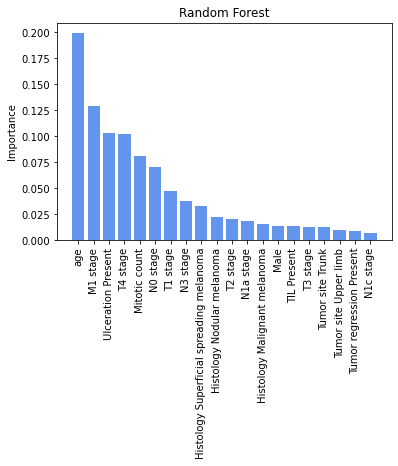

,feature,importance
1,age,0.199207
24,M1 stage,0.129323
25,Ulceration Present,0.102776
13,T4 stage,0.102399
2,Mitotic count,0.081545
15,N0 stage,0.070582
10,T1 stage,0.047069
22,N3 stage,0.037654
9,Histology Superficial spreading melanoma,0.032975
7,Histology Nodular melanoma,0.022411


In [56]:
#plt.figure(figsize=(10, 6), dpi=80)


clf = clf
X_plot = X_train
c = 'cornflowerblue' # 'orange' 'cornflowerblue'

# get importance
importance = clf.feature_importances_
df_importance = pd.DataFrame(X_plot.columns,  columns = ['feature'])
df_importance['importance'] = importance

# sorty by importance
df_importance = df_importance.sort_values(by = 'importance', ascending = False)
df_importance = df_importance[df_importance.importance > 0]

# plot 15 most important features nonn zero
plt.bar(df_importance.feature[:20], df_importance.importance[:20], color = c)
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Random Forest')

plt.show()

df_importance

#### ROC curve and AUC

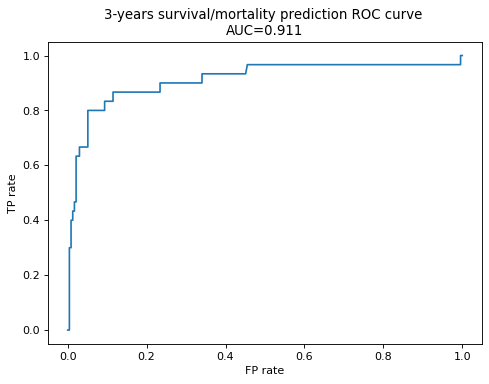

In [55]:
plt.figure(figsize=(7, 5), dpi=80)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

'''y_pred_proba = clf.predict_proba(X_test)[::,0]
fpr, tpr, _ = roc_curve(1*(y_test == 0),  y_pred_proba)
auc = roc_auc_score(1*(y_test == 0), y_pred_proba)'''

plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.title("3-years survival/mortality prediction ROC curve \nAUC="+str(round(auc, 3)))
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.show()

### kNN


In [149]:
n_neighbors = 7
weights = 'uniform' #'uniform', 'distance'

clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights).fit(X_train, y_train)

# cross validation and hyperparameter tuning
print_clf_cv_scores(clf, X_train, y_train, 'KNN')

-------- CV MEAN SCORES (k = 10) KNN --------
0.905 accuracy with a standard deviation of 0.007
0.633 balanced accuracy with a standard deviation of 0.025
0.752 precision with a standard deviation of 0.034
0.633 recall with a standard deviation of 0.025
0.666 f1 score with a standard deviation of 0.027


In [150]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.917 accuracy
0.804 balanced
0.367 precision
0.677 recall
0.476 f1 score
-------------------- TEST SCORES ---------------------
0.898 accuracy
0.786 balanced
0.200 precision
0.667 recall
0.308 f1 score


### Deep Learning

In [198]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ModuleNotFoundError: No module named 'keras'

In [199]:
# define Dense NN model
import tensorflow as tf
from tensorflow import keras



def create_dnn(num_features,  dense_units = 16, reg_term = 0.01):
  # layers
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape = (num_features,1)))
  model.add(keras.layers.Dense(dense_units, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(reg_term)))
  model.add(keras.layers.Dense(dense_units, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(reg_term)))
  model.add(keras.layers.Dense(1, activation="sigmoid")) # output layer for binary classification

  return model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
dense_units_s = 32 #16, 8      # number of units for the dense layers
num_epochs_s = 250 #300, 150   # number of training epochs
reg_term_s = 0.001 #0.01       # regularization factor
batch_s = 256 #128             # batch size
